In [5]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import NMF
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

##### Evaluating clustering with ground truth
- 훈련 데이터에 대한 Target을 알고 있을 때 Clustering Algorithm 평가방법
  - ARI (Adjusted Rand Index)
    - adjusted_rand_score(y, predicted_clusters)
    - 무작위 클러스터링: 0
    - 1에 가까운 값일수록 타깃과 더 유사한 클러스터링 결과
  - NMI (Normalized Mutual Information)
    - normalized_mutual_infro_score(y, predicted_clusters)  
    - 무작위 클러스터링: 0
    - 1에 가까운 값일수록 타깃과 더 유사한 클러스터링 결과  

In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

- ARI (Adjusted Rand Index)

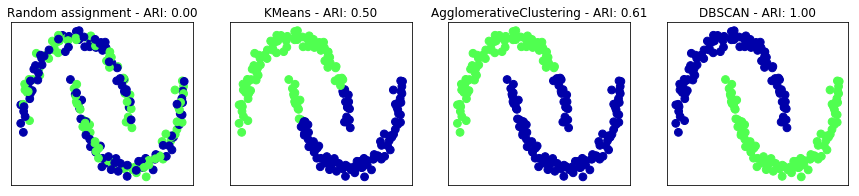

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

- NMI (Normalized Mutual Information)

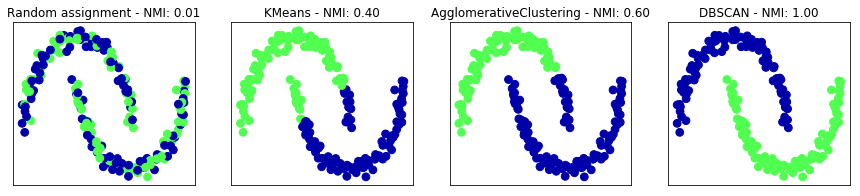

In [8]:
from sklearn.metrics.cluster import normalized_mutual_info_score
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - NMI: {:.2f}".format(normalized_mutual_info_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - NMI: {:.2f}".format(algorithm.__class__.__name__, normalized_mutual_info_score(y, clusters)))

In [10]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

# normalized mutual information score is 1, as the clustering is exactly the same:
print("NMI: {:.2f}".format(normalized_mutual_info_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
NMI: 1.00


##### Evaluating clustering without ground truth
- 수집한 데이터 자체에 Target 값이 없을 때 클러스터링 알고리즘 성능 평가하기
  - Sihouette Coefficient (실루엣 계수)
    - 그다지 추천하지 않음
    - 클러스터의 밀집정도를 계산함 - 밀집정도가 높을 수록 1에 가까운 값을 반환함.
  - Robustness-based Evaluation (견고성 기반 평가)
    - 데이터에 잡음 포인트를 추가하거나 여러가지 매개변수 설정으로 알고리즘을 실행하여도 클러스터 구성이 변하지 않을 때 해당 클러스터 구성 결과에 높은 신뢰도가 있다고 볼 수 있음
    - scikit-learn에서는 지원하지 않음
  - 사람이 직접 확인하는 방법

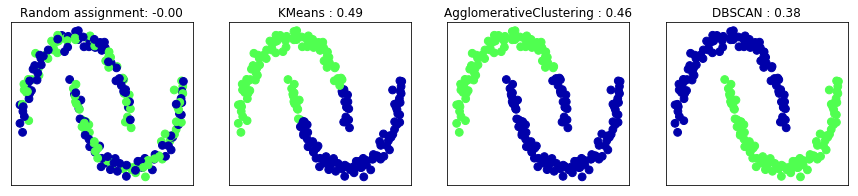

In [11]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

##### Comparing algorithms on the faces dataset
- LFW 데이터셋에 대한 k-means, DBSCAN, Agglomerative Clustering 적용 결과 비교
- LFW 데이터셋에 대하여 PCA 적용하여 주성분 100개의 얼굴데이터 활용

In [13]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)

print("mask.shape:", mask.shape)
print()

print("np.unique(people.target):\n{0}".format(np.unique(people.target)))
print()

for target in np.unique(people.target):
    print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    print()
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

mask.shape: (196,)

np.unique(people.target):
[0 1 2 3]

np.where(people.target == 0):
(array([  2,   3,   6,   7,   8,  11,  13,  17,  18,  21,  23,  24,  25,
        28,  29,  30,  33,  35,  36,  37,  39,  40,  41,  43,  47,  48,
        50,  51,  53,  56,  59,  61,  62,  63,  65,  67,  68,  72,  73,
        74,  77,  79,  81,  82,  83,  86,  87,  89,  90,  93,  95,  96,
        97,  99, 102, 104, 105, 107, 108, 112, 113, 116, 117, 118, 119,
       120, 121, 123, 124, 127, 128, 130, 132, 133, 134, 139, 140, 141,
       142, 144, 145, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163,
       165, 166, 167, 168, 169, 173, 176, 177, 181, 182, 184, 185, 188,
       190, 191, 192, 193, 195], dtype=int64),)

np.where(people.target == 1):
(array([  0,   1,  14,  15,  16,  20,  22,  26,  31,  34,  38,  42,  45,
        52,  54,  55,  57,  69,  70,  75,  80,  84,  88,  92,  94,  98,
       103, 106, 109, 111, 114, 115, 122, 129, 135, 143, 153, 157, 172,
       178, 179, 180, 183, 186], dtype=i

In [16]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)
print("X_pca : {}",X_pca)

X_pca : {} [[-0.758 -1.132  0.114 ...  0.682  2.415 -0.404]
 [ 1.685 -0.24  -0.808 ... -0.657  0.205 -1.387]
 [-0.809  0.286 -0.665 ...  0.66   0.111  0.758]
 ...
 [ 1.948 -2.078  1.04  ... -0.059  0.02   0.045]
 [ 2.207 -1.035  1.17  ... -1.527  0.039  0.522]
 [ 2.217 -0.677 -0.056 ... -0.496 -0.468 -0.479]]


##### Analyzing the faces dataset with DBSCAN

- eps=0.5, min_samples=5

In [21]:
# apply DBSCAN with default parameters
dbscan = DBSCAN(eps=0.5,min_samples=5)
labels = dbscan.fit_predict(X_pca)
print("dscan : {}",dbscan)
print("labels : {}",labels)
print("Unique labels: {}".format(np.unique(labels)))

dscan : {} DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)
labels : {} [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Unique labels: [-1]


- eps=0.5, min_samples=3

In [29]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("dscan : {}",dbscan)
print("labels : {}",labels)
print("Unique labels: {}".format(np.unique(labels)))

dscan : {} DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)
labels : {} [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Unique labels: [-1]


- eps=15, min_samples=3

In [30]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("dscan : {}",dbscan)
print("labels : {}",labels)
print("Unique labels: {}".format(np.unique(labels)))

dscan : {} DBSCAN(algorithm='auto', eps=15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)
labels : {} [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Unique labels: [0]


- 잡음 포인트와 클러스터로 분류된 포인트의 개수를 카운트
- np.bincount 활용
  - np.bincount는 음수를 허용하지 않기 때문에 1을 더하여 활용 
  - 잡음 포인트: 31개
  - 클러스터로 분류된 포인트: 1945개

In [25]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  0 137]
